#결정트리

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
import pandas as pd
import numpy as np
iris_df=pd.DataFrame(iris["data"], columns=['sepal length',  'sepal width',  'petal length',  'petal width'] )
iris_df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
input=iris["data"]

In [7]:
target=iris["target"]

In [8]:
#훈련셋 테스트셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(input,target, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [11]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=2)
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.9583333333333334
0.9666666666666667


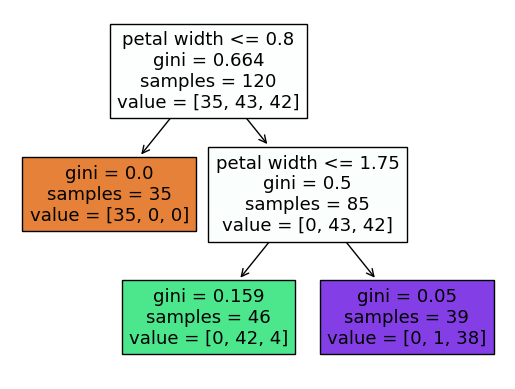

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(dtc, filled=True, feature_names=['sepal length',  'sepal width',  'petal length',  'petal width'])
plt.show()

In [17]:
dtc.feature_importances_

array([0., 0., 0., 1.])

In [19]:
#from sklearn.datasets import load_diabetes
#diabetes=load_diabetes()


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

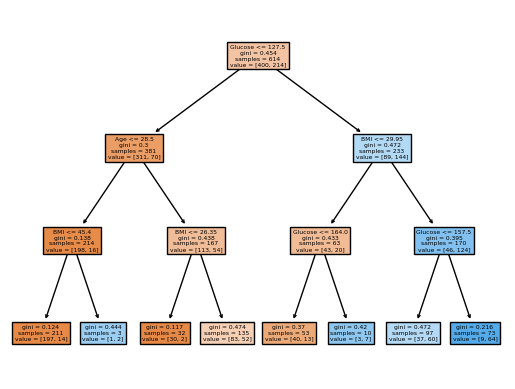

array([0.        , 0.64681009, 0.        , 0.        , 0.        ,
       0.23523743, 0.        , 0.11795248])

In [35]:
#input, target  분리
diabetes=pd.read_csv("/content/diabetes.csv")
print(diabetes)
X=diabetes.drop("Outcome", axis=1)
y=diabetes["Outcome"]
#train test  분리
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#결정트리 학습=> score확인
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))
#그림
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plot_tree(dtc, filled=True, feature_names=["Pregnancies",  "Glucose",  "BloodPressure",  "SkinThickness",  "Insulin"   ,"BMI", "Pedigree" , "Age"])
plt.show()
#중요한 특성 출력
dtc.feature_importances_

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,dtc.predict(X))

array([[437,  63],
       [106, 162]])

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=2, n_jobs=-1)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
rfc.feature_importances_

0.7817589576547231
0.7467532467532467


array([0.08224895, 0.39401686, 0.01047436, 0.0298768 , 0.08096937,
       0.18186336, 0.03659838, 0.18395192])

In [38]:
#붓꽃데이터 랜덤포레스트
#훈련셋 테스트셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(input,target, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_depth=2, n_jobs=-1)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
rfc.feature_importances_

0.9583333333333334
0.9666666666666667


array([0.12176247, 0.01610259, 0.42536372, 0.43677121])

In [46]:
from tensorflow.keras.utils import to_categorical
y_train_encoded=to_categorical(y_train,3)
y_test_encoded=to_categorical(y_train,3)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(64, input_dim=4, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                320       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"] )
from tensorflow.keras.callbacks import EarlyStopping
es= EarlyStopping(monitor="val_loss" ,patience=10 )
history=model.fit(X_train, y_train_encoded, validation_data=(X_train, y_train_encoded), callbacks=[es], epochs=300)

Epoch 1/300
4/4 [==============================] - 1s 83ms/step - loss: 0.0835 - accuracy: 0.9667 - val_loss: 0.0704 - val_accuracy: 0.9833
Epoch 2/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0755 - accuracy: 0.9750 - val_loss: 0.0773 - val_accuracy: 0.9750
Epoch 3/300
4/4 [==============================] - 0s 24ms/step - loss: 0.0843 - accuracy: 0.9667 - val_loss: 0.0784 - val_accuracy: 0.9750
Epoch 4/300
4/4 [==============================] - 0s 17ms/step - loss: 0.0728 - accuracy: 0.9750 - val_loss: 0.0660 - val_accuracy: 0.9667
Epoch 5/300
4/4 [==============================] - 0s 20ms/step - loss: 0.0651 - accuracy: 0.9833 - val_loss: 0.0698 - val_accuracy: 0.9833
Epoch 6/300
4/4 [==============================] - 0s 21ms/step - loss: 0.0726 - accuracy: 0.9833 - val_loss: 0.0702 - val_accuracy: 0.9833
Epoch 7/300
4/4 [==============================] - 0s 19ms/step - loss: 0.0718 - accuracy: 0.9750 - val_loss: 0.0663 - val_accuracy: 0.9750
Epoch 8/300
4/4 [===

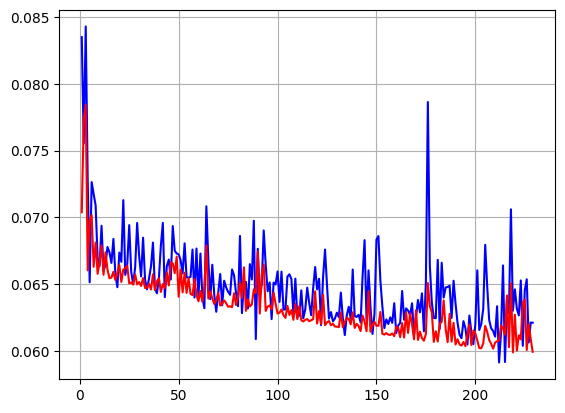

In [70]:
loss=history.history["loss"]
v_loss=history.history[ "val_loss"]
x_len=np.arange(1, len(loss)+1)
plt.grid()
plt.plot(x_len, loss, color="blue")
plt.plot(x_len, v_loss, color="red")

In [76]:
diabetes=pd.read_csv("/content/diabetes.csv")
data=diabetes.values
input=data[:, :8]
target=data[:, 8]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(input,target, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(614, 8) (154, 8) (614,) (154,)


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(32, input_dim=8, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"] )
from tensorflow.keras.callbacks import EarlyStopping
es= EarlyStopping(monitor="val_loss" ,patience=10 )
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),
                  callbacks=[es], epochs=300)


Epoch 1/300
20/20 [==============================] - 2s 18ms/step - loss: 26.1972 - accuracy: 0.6417 - val_loss: 8.8782 - val_accuracy: 0.6883
Epoch 2/300
20/20 [==============================] - 0s 6ms/step - loss: 5.1273 - accuracy: 0.5782 - val_loss: 3.0822 - val_accuracy: 0.3636
Epoch 3/300
20/20 [==============================] - 0s 6ms/step - loss: 1.4043 - accuracy: 0.5896 - val_loss: 1.2590 - val_accuracy: 0.6364
Epoch 4/300
20/20 [==============================] - 0s 7ms/step - loss: 1.0742 - accuracy: 0.6287 - val_loss: 0.9692 - val_accuracy: 0.6558
Epoch 5/300
20/20 [==============================] - 0s 6ms/step - loss: 0.9670 - accuracy: 0.6303 - val_loss: 0.9842 - val_accuracy: 0.6299
Epoch 6/300
20/20 [==============================] - 0s 5ms/step - loss: 0.8495 - accuracy: 0.6498 - val_loss: 1.0265 - val_accuracy: 0.5779
Epoch 7/300
20/20 [==============================] - 0s 7ms/step - loss: 0.8091 - accuracy: 0.6433 - val_loss: 0.8412 - val_accuracy: 0.5974
Epoch 8/300

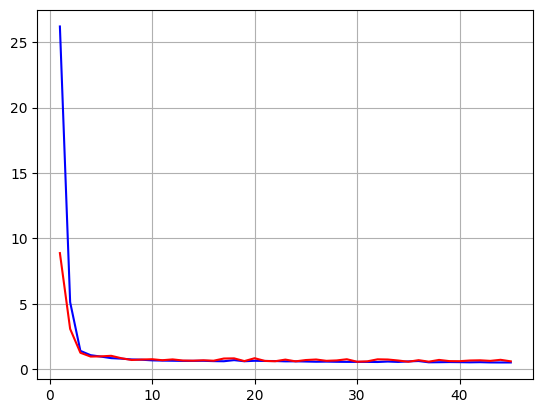

In [88]:
loss=history.history["loss"]
v_loss=history.history[ "val_loss"]
x_len=np.arange(1, len(loss)+1)
plt.grid()
plt.plot(x_len, loss, color="blue")
plt.plot(x_len, v_loss, color="red")

In [92]:
prediction=np.round(model.predict(input).squeeze(),0)

24/24 [==============================] - 0s 2ms/step


In [93]:
confusion_matrix(target, prediction)

array([[427,  73],
       [121, 147]])

# 신경망으로 수치예측

In [97]:
from sklearn.datasets import load_diabetes
diabetes_reg=load_diabetes()
diabetes_reg

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [119]:
#input 과 target 추출
input=diabetes_reg["data"]
target=diabetes_reg["target"]
#훈련, 테스트 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(input,target, test_size=0.2)
#신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(200, input_dim=X_train.shape[1], activation="linear"))
model.add(Dense(80, activation="linear"))
model.add(Dense(1, activation="linear"))
model.compile(loss="mse", optimizer="adam", metrics=["mae"] )
from tensorflow.keras.callbacks import EarlyStopping
es= EarlyStopping(monitor="val_loss" ,patience=10 )
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),
                  callbacks=[es], epochs=300)
#예측

Epoch 1/300
12/12 [==============================] - 1s 23ms/step - loss: 29413.3516 - mae: 153.1523 - val_loss: 27318.6289 - val_mae: 146.8401
Epoch 2/300
12/12 [==============================] - 0s 8ms/step - loss: 29136.3535 - mae: 152.2898 - val_loss: 26874.4473 - val_mae: 145.3931
Epoch 3/300
12/12 [==============================] - 0s 8ms/step - loss: 28495.3457 - mae: 150.2442 - val_loss: 25935.3633 - val_mae: 142.3100
Epoch 4/300
12/12 [==============================] - 0s 8ms/step - loss: 27250.3770 - mae: 146.2566 - val_loss: 24323.0527 - val_mae: 136.8388
Epoch 5/300
12/12 [==============================] - 0s 8ms/step - loss: 25265.1895 - mae: 139.5763 - val_loss: 21895.0957 - val_mae: 128.1059
Epoch 6/300
12/12 [==============================] - 0s 8ms/step - loss: 22360.5195 - mae: 129.0681 - val_loss: 18531.7383 - val_mae: 114.8992
Epoch 7/300
12/12 [==============================] - 0s 8ms/step - loss: 18378.5176 - mae: 113.8416 - val_loss: 14464.2979 - val_mae: 96.8403

In [120]:
prediction=model.predict(input).squeeze()

14/14 [==============================] - 0s 2ms/step


In [121]:
from sklearn.metrics import r2_score
r2_score(target, prediction)

0.49649665566705115

In [111]:
#선형회귀
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
lr.score(X_test, y_test)
lr.score(input, target)

0.5129051959561307